In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime



In [123]:
system_names = ['rossler','rabinovich_fabrikant','lorentz','chua']
system_names = [system + '1d' for system in system_names]


time_start = datetime(2020, 7, 25, 18) 
result_file0 = './result_attention0.csv' 
df = pd.read_csv(result_file0, index_col = 'datetime')
df.index = pd.DatetimeIndex(df.index)
df = df[df.index > time_start]
set(df['model_name'])

{'ESN',
 'ESN-ATTN',
 'RBFLN',
 'RBFLN-RE-echostate',
 'RBFLN-RE-transform',
 'RBFN',
 'VAR'}

# mse v.s. embedding dimension

rossler1d


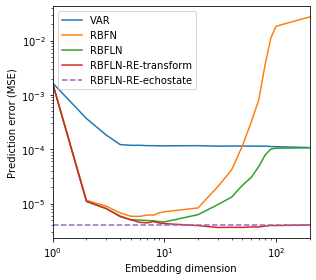

rabinovich_fabrikant1d


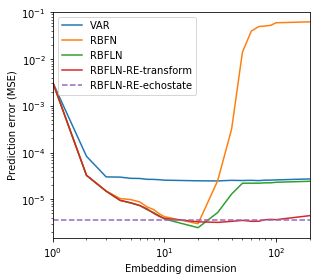

lorentz1d


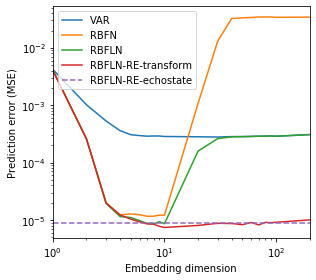

chua1d


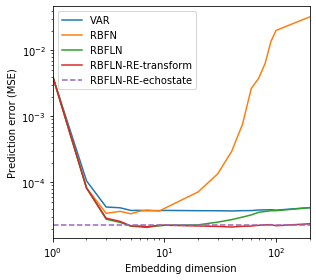

In [126]:
for system_name in system_names:
    print(system_name)
    average = pd.DataFrame()
    for i in range(10):
        result_file = './result_attention' +str(i) + '.csv' 
        df = pd.read_csv(result_file, index_col = 'datetime')
        df.index = pd.DatetimeIndex(df.index)
        df = df[df.index > time_start]

        result = df[df['system_name'].isin([system_name]) & df['horizon'].isin([1])]


        final = None
        for w in set(result['n_history']):

            temp = result.loc[result['n_history'] == w, ['model_name', 'mse', 'n_history']].groupby('model_name').min().reset_index()

            final = temp if final is None else final.append(temp, ignore_index=True)

        average = average.append(final)
        
    fig, ax = plt.subplots(figsize=(4.5,4))
    models1 = [ 'VAR', 'RBFN', 'RBFLN', 'RBFLN-RE-transform']
    models2 = ['RBFLN-RE-echostate']
    
    for name in models1:
        average.loc[average['model_name'] == name].groupby('n_history').mean().sort_values(by='n_history').plot(ax = ax)

    for name in models2:
        esn = average.loc[average['model_name'] == name].groupby('n_history').mean().mean()
        plt.plot([1,200], [esn,esn], '--', label=name)

    plt.legend(labels= models1+models2, loc='upper left')
    ax.set_yscale("log")
    ax.set_xscale("log")
    plt.xlabel('Embedding dimension')
    plt.ylabel('Prediction error (MSE)')
    plt.tight_layout()
    # plt.savefig('../attention_'+system_name+'_mse_window'+datetime.now().strftime('_%Y_%m_%d_%H_%M')+'.pdf')
    plt.savefig('../attention_'+system_name+'_mse_window.pdf')
    plt.show()


In [3]:
import pandas as pd

path = 'result/grid_search'
filename = path+'/system=Lorenz,seed={},Nx={},input={}'.format(42, 100, 'x') + '.csv'
df = pd.read_csv(filename, names=['a','K','b','ex','ey','ez'])
df

,a,K,b,ex,ey,ez
0,0.1,0.2,0.2,9.736810e-05,0.001224,0.004968
1,0.1,0.2,0.4,2.948863e-05,0.000273,0.000669
2,0.1,0.2,0.6,1.445459e-05,0.000140,0.000318
3,0.1,0.2,0.8,8.299341e-06,0.000083,0.000184
4,0.1,0.2,1.0,5.593868e-06,0.000055,0.000147
...,...,...,...,...,...,...
995,1.0,2.0,1.2,9.254303e-07,0.000014,0.003381
996,1.0,2.0,1.4,1.028023e-06,0.000018,0.003985
997,1.0,2.0,1.6,1.103594e-06,0.000020,0.005053
998,1.0,2.0,1.8,1.128662e-06,0.000022,0.005776


In [5]:
df['ex'].min()

1.910837838359768e-07

In [19]:
filename = 'result/reservoir observer/Rossler-x.csv'
header = ['seed', 'ex', 'ey', 'ez','ex2', 'ey2', 'ez2','a', 'K', 'inputscaling', 'beta']
df = pd.read_csv(filename, names=header)
df.describe()

,seed,ex,ey,ez,ex2,ey2,ez2,a,K,inputscaling,beta
count,1.0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000
mean,0.0,1.388435e-07,4.854770e-07,0.000001,1.131611e-07,2.869503e-07,9.002708e-07,0.195279,1.902932,1.542403,-1.229144
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,1.388435e-07,4.854770e-07,0.000001,1.131611e-07,2.869503e-07,9.002708e-07,0.195279,1.902932,1.542403,-1.229144
25%,0.0,1.388435e-07,4.854770e-07,0.000001,1.131611e-07,2.869503e-07,9.002708e-07,0.195279,1.902932,1.542403,-1.229144
50%,0.0,1.388435e-07,4.854770e-07,0.000001,1.131611e-07,2.869503e-07,9.002708e-07,0.195279,1.902932,1.542403,-1.229144
75%,0.0,1.388435e-07,4.854770e-07,0.000001,1.131611e-07,2.869503e-07,9.002708e-07,0.195279,1.902932,1.542403,-1.229144
max,0.0,1.388435e-07,4.854770e-07,0.000001,1.131611e-07,2.869503e-07,9.002708e-07,0.195279,1.902932,1.542403,-1.229144


Text(0, 0.5, 'ey2')

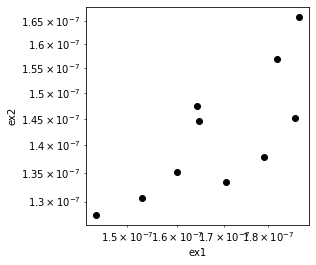

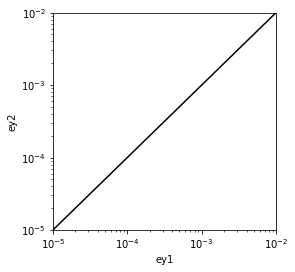

In [5]:
plt.figure(figsize=(4,4))
plt.scatter(df['ex'],df['ex2'], color='k')
# plt.plot()
# plt.plot([0,1], 'k')
# plt.xlim([1e-5,1e-2])
# plt.ylim([1e-5,1e-2])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ex1')
plt.ylabel('ex2')

plt.figure(figsize=(4,4))
plt.scatter(df['ey'],df['ey2'], color='k')
# plt.plot()
plt.plot([0,1], 'k')
plt.xlim([1e-5,1e-2])
plt.ylim([1e-5,1e-2])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ey1')
plt.ylabel('ey2')

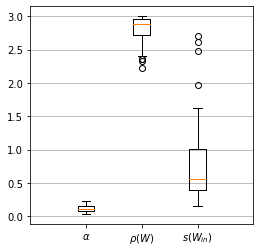

In [39]:
fig, ax = plt.subplots(figsize=(4,4))

# ax.violinplot([df['a'], df['K'], df['inputscaling']],
#                showmeans=False,
#                showmedians=True,
#               showextrema=False,
#               quantiles=[[0.25,0.5,0.75]]*3
#                )

ax.boxplot([df['a'], df['K'], df['inputscaling']])

ax.yaxis.grid(True)
ax.set_xticks([y+1 for y in range(3)], )

ax.set_xlim([0,4])
plt.setp(ax, xticks=[y+1 for y in range(3)],
        xticklabels=[r'$\alpha$', r'$\rho(W)$', r'$s(W_{in})$'],
        )
# plt.savefig(path+'/params_bo.pdf', transparent=True)
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

system_name = 'Rossler'
path = 'result/reservoir observer'
filename = path+'/{}-mfnn-kr.csv'.format(system_name)
df0 = pd.read_csv(filename, names=['inputdata', 'seed', 'mfnn','e1x', 'e1y','e1z','e2x', 'e2y','e2z',  'a', 'K', 'inputscaling','beta'])
df0

,inputdata,seed,mfnn,e1x,e1y,e1z,e2x,e2y,e2z,a,K,inputscaling,beta
0,x,0,3.220291,1.752634e-07,7.065679e-07,1.015951e-06,1.033112e-07,2.954225e-07,5.343924e-07,0.187988,2.404513,2.401037,-0.951502
1,x,1,3.183417,1.934368e-07,1.376824e-06,1.275786e-06,1.324695e-07,5.758183e-07,6.286414e-07,0.263433,2.211745,1.619605,-1.241301
2,x,2,4.737986,1.831918e-07,8.672795e-07,8.923969e-07,1.541913e-07,5.339009e-07,5.879994e-07,0.260624,2.025386,1.818720,-0.720189
3,x,3,4.225752,1.749639e-07,1.142932e-06,1.336593e-06,1.596382e-07,8.201601e-07,8.695362e-07,0.314009,1.930692,1.075031,0.895222
4,x,4,4.235253,1.729400e-07,8.801560e-07,1.230924e-06,1.375664e-07,4.268450e-07,7.927835e-07,0.252487,2.108066,1.704714,-0.942832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,xyz,15,5.707589,3.403170e-07,7.854549e-08,3.643346e-07,8.301584e-08,3.835034e-08,1.565066e-07,0.121923,1.933756,1.727035,-1.465296
76,xyz,16,5.806588,3.126809e-07,7.541679e-08,2.195858e-07,1.604592e-07,4.329316e-08,1.548573e-07,0.153221,1.303794,1.792597,1.538950
77,xyz,17,6.719281,2.313629e-07,6.885708e-08,3.091740e-07,1.188176e-07,4.017360e-08,1.237028e-07,0.202448,1.984332,0.951451,-0.418206
78,xyz,18,8.094913,9.336613e-08,4.075978e-08,2.425495e-07,5.507284e-08,3.263849e-08,1.855035e-07,0.100361,1.640789,1.442761,0.059237


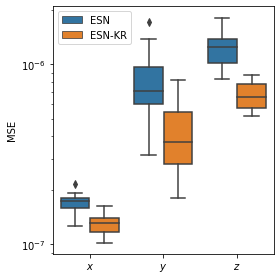

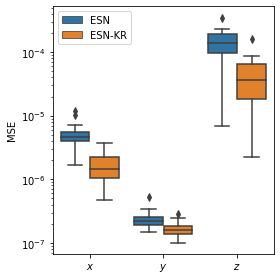

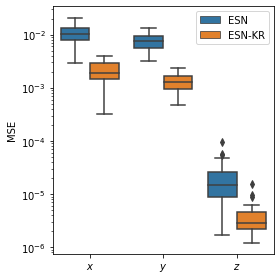

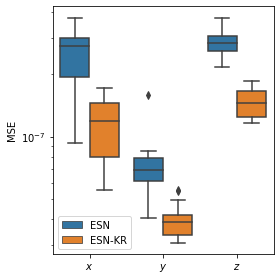

In [6]:
for dim in ['x','y','z','xyz']:
    df = df0[df0['inputdata'] == dim]

    indice1 = ['e1x', 'e1y','e1z']
    indice2 = ['e2x', 'e2y','e2z']
    indice_new = ['x','y','z']

    temp = pd.concat([pd.DataFrame(df[indice1].values, columns=indice_new),pd.DataFrame(df[indice2].values, columns=indice_new)],
              keys=('ESN','ESN-KR'))\
    .stack()\
    .rename_axis(index=['Model', '', 'Dim'])\
    .reset_index(level=[0,2], name='MSE')

    plt.figure(figsize=(4,4))
    ax = sns.boxplot(data=temp, x='Dim', hue='Model', y='MSE')
    handles,labels = ax.get_legend_handles_labels()          # Get the artists.
    ax.legend(handles, labels, loc="best")
    ax.set_xticklabels([r'$x$', r'$y$', r'$z$'])
    plt.yscale('log')
    plt.xlabel('')
    plt.ylabel('MSE')
    plt.tight_layout()
    plt.savefig(path+'/ESNKR-{}-{}.pdf'.format(system_name, dim))

In [9]:
df.describe()

,seed,mfnn,e1x,e1y,e1z,e2x,e2y,e2z,a,K,inputscaling,beta
count,20.00000,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000
mean,9.50000,5.936610,2.501045e-07,7.158019e-08,2.837414e-07,1.144979e-07,3.947152e-08,1.470025e-07,0.158665,1.771959,1.549320,-1.035121
std,5.91608,1.137792,7.092470e-08,2.396876e-08,4.216074e-08,3.817991e-08,7.211192e-09,2.379904e-08,0.038884,0.365987,0.344397,1.015383
min,0.00000,3.945983,9.336613e-08,4.075978e-08,2.153721e-07,5.507284e-08,3.087169e-08,1.164007e-07,0.091962,1.171849,0.944045,-2.388568
25%,4.75000,5.203567,1.947989e-07,6.106982e-08,2.577103e-07,8.007492e-08,3.369613e-08,1.245383e-07,0.137892,1.553851,1.400348,-1.766828
50%,9.50000,5.757089,2.725706e-07,6.895724e-08,2.826173e-07,1.195548e-07,3.858713e-08,1.447692e-07,0.151270,1.790171,1.593871,-1.081850
75%,14.25000,6.636618,2.982620e-07,7.861491e-08,3.037848e-07,1.456761e-07,4.179144e-08,1.654176e-07,0.182907,1.963958,1.741970,-0.667768
max,19.00000,8.094913,3.742812e-07,1.592672e-07,3.709907e-07,1.708600e-07,5.530990e-08,1.860704e-07,0.239663,2.727385,2.203737,1.538950


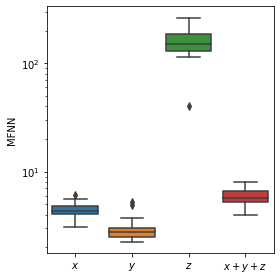

In [170]:
plt.figure(figsize=(4,4))
g = sns.boxplot(data=df0, x='inputdata', y='mfnn')
g.set_xticklabels([r'$x$', r'$y$', r'$z$', r'$x+y+z$'], rotation=0) 
plt.yscale('log')
plt.xlabel('')
plt.ylabel('MFNN')
plt.tight_layout()
plt.savefig(path+'/MFNN-{}.pdf'.format(system_name))

In [22]:
from scipy.stats import spearmanr, kendalltau

# prepare data

data1 = df['mfnn']
data2 = df['e1z']

# calculate spearman's correlation

coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance

alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.105
Samples are uncorrelated (fail to reject H0) p=0.659
